## **Time Series Anomaly Detection via Isolation Forest**
**Intro:** Currently, I'm looking into time series anomaly detection with isolation forests and wanted to share this kernel in which I applied the isolation forest algorithm on the new york city taxi data from the numenta anomaly benchmark (NAB). We will build a model for detecting anomalies in the data and use the anomaly scores of the trained model for post training fine-tuning of the decision boundary. Also, we will visualize respective results and the structure of corresponding example trees.

**Acknowledgements:**
Before we start, I would like to acknowledge [this kernel](https://www.kaggle.com/code/joshuaswords/time-series-anomaly-detection) from which I took most of the visualizations used below (sometimes with small changes/additions). Also, I would like to highlight [this post](https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn) for the code used for plotting isolation trees from our resulting isolation forest (reused with small changes/additions).

**The Isolation Forest Algorithm:** From the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest.decision_function): "The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node. This path length, averaged over a forest of such random trees, is a measure of normality and our decision function. Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produces shorter path lengths for particular samples, they are highly likely to be anomalies."

**With this in mind, let's now build a model for detecting anomalies!**

## **Importing Libraries**

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
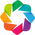

In [1]:
# Import code
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.models import HoverTool
from IPython.display import HTML, display
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn import tree
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Understanding the Data**
For this notebook, we will use the **new york city taxi data** from the **numenta anomaly benchmark (NAB)**. The value column in the data contains the number of NYC taxi passengers and results from aggregating the total number of taxi passengers into 30 minute buckets. Let's have a look at the data:

In [2]:
df = pd.read_csv('/kaggle/input/realKnownCause/realKnownCause/nyc_taxi.csv', parse_dates=['timestamp'])
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [3]:
df.describe()

,timestamp,value
count,10320,10320.000000
mean,2014-10-16 11:45:00,15137.569380
min,2014-07-01 00:00:00,8.000000
25%,2014-08-23 17:52:30,10262.000000
50%,2014-10-16 11:45:00,16778.000000
75%,2014-12-09 05:37:30,19838.750000
max,2015-01-31 23:30:00,39197.000000
std,NaN,6939.495808


In [4]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

Cool, there are no missing values, so we don't have to worry about imputation :). Let's check out the time frame of the data:

In [5]:
print('Start time: ', df['timestamp'].min())
print('End time: ', df['timestamp'].max())
print('Time difference: ', df['timestamp'].max()-df['timestamp'].min())

Start time:  2014-07-01 00:00:00
End time:  2015-01-31 23:30:00
Time difference:  214 days 23:30:00


## **Data Visualization**
Let's now visualize the data to get a better understanding of it. We use resampling on the data to be able to see patterns of different frequencies.

In [6]:
Hourly = hv.Curve(df.set_index('timestamp').resample('H').mean()).opts(
    opts.Curve(title="New York City Taxi Passenger Number Hourly", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

Daily = hv.Curve(df.set_index('timestamp').resample('D').mean()).opts(
    opts.Curve(title="New York City Taxi Passenger Number Daily", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

Weekly = hv.Curve(df.set_index('timestamp').resample('W').mean()).opts(
    opts.Curve(title="New York City Taxi Passenger Number Weekly", xlabel="Date", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

(Hourly + Daily + Weekly).opts(shared_axes=False).cols(1)

:Layout
   .Curve.I   :Curve   [timestamp]   (value)
   .Curve.II  :Curve   [timestamp]   (value)
   .Curve.III :Curve   [timestamp]   (value)

In the second plot, it is possible to identify 6 anomalies with the following dates:
* 2014-07-05
* 2014-09-01
* 2014-11-01
* 2014-11-27
* 2014-12-25
* 2015-01-27.

Our goal is now to build an isolation forest model which detects these points as anomalies. In order to have a realistic setting, we will split the data set into train (containing the first 3 anomalies) and test (containing the last 3 anomalies) sets. The train set will be used for training and parameter tuning and on the test set we will check if our model generalizes well to new data. Also, we will use the averaged daily data for training and testing since this granularity seems to fit best for our application.

## **Modeling**
We first split our data into train and test sets and we will then only use the train set for model training and algorithmic design decisions:

In [7]:
# resample data and split data into train (~2/3 of data) and test (~1/3 of data) sets
df_model1 = df.set_index('timestamp').resample('D').mean().reset_index()
df_train_split1, df_test_split1 = np.split(df_model1, [int(0.65 *len(df_model1))])

In [8]:
df_train_split1.head()

,timestamp,value
0,2014-07-01,15540.979167
1,2014-07-02,15284.166667
2,2014-07-03,14794.625000
3,2014-07-04,11511.770833
4,2014-07-05,11572.291667


In [9]:
df_test_split1.head()

,timestamp,value
139,2014-11-17,13722.791667
140,2014-11-18,15499.437500
141,2014-11-19,15568.625000
142,2014-11-20,15733.312500
143,2014-11-21,17223.708333


We now plot the value distribution of our training set:

In [10]:
df_visualize = df.set_index('timestamp').resample('D').mean()
df_visualize_train, _ = np.split(df_visualize, [int(0.65 *len(df_visualize))])

(hv.Distribution(df_visualize_train)
.opts(opts.Distribution(title="Value Distribution Training Data",
                        xlabel="Value",
                        ylabel="Density",
                        width=700, height=300,
                        show_grid=True)
     ))

:Distribution   [value]   (Density)

Having the 3 anomalies from our training set in mind, we can already find that the anomalies we want to detect lay in the tails of the value distribution. We can now use this finding to decide that it should be enough to just use the unaltered values as feature in our model and actual feature engineering shouldn't be necessary for succeeding in our task.

In [11]:
# define model features
features = ['value']
df_train1 = df_train_split1[features]
df_test1 = df_test_split1[features]

We estimate the contamination (the proportion of outliers in the data set) of our data to be 3/139 (#anomalies in training set/#data points in training set) respectively after rounding up approximately 0.03. With this, we train the model and get the predictions and anomaly scores of our model. The anomaly scores will be used later on for fine-tuning the model.

In [12]:
model = IsolationForest(random_state=0, contamination=0.03)
model.fit(df_train1)
outliers_train = pd.Series(model.predict(df_train1)).apply(lambda x: 1 if x == -1 else 0).to_numpy()
anomaly_score_train = model.decision_function(df_train1)

In [13]:
# add prediction results to data frame for visualization purposes
df_train_split1 = df_train_split1.assign(outliers = outliers_train)
df_train_split1 = df_train_split1.assign(anomaly_score = anomaly_score_train)
df_train_split1.head()

,timestamp,value,outliers,anomaly_score
0,2014-07-01,15540.979167,0,0.228952
1,2014-07-02,15284.166667,0,0.222405
2,2014-07-03,14794.625000,0,0.243243
3,2014-07-04,11511.770833,1,-0.012208
4,2014-07-05,11572.291667,1,-0.001945


How many outliers did we actually predict?

In [14]:
df_train_split1['outliers'].sum()

5

Ok, that sounds a bit too much but let's quickly visualize the anomalies (in red) and also the normal data points (in green) to get a better overview:

In [15]:
# unfortunately the timestamps in these plots are broken and I was not able fix them within a reasonable amount of time
# thats why, we have to live with this for now...
tooltips = [
    ('Timestamp', '@timestamp'),
    ('Value', '@value'),
    ('Outliers', '@outliers'),
    ('Anomaly_Score', '@anomaly_score')
]
hover = HoverTool(tooltips=tooltips)
hv.Points(df_train_split1.query("outliers == 1")).opts(size=8, color='#ff0000') * hv.Points(df_train_split1.query("outliers == 0")).opts(size=8, color='#048c2d') * hv.Curve(df_train_split1).opts(opts.Curve(title="New York City Taxi Passenger Number - Anomalies and Normal Data", xlabel="", ylabel="Number Passengers" , height=300, responsive=True,tools=[hover,'box_select', 'lasso_select', 'tap'],show_grid=True))

:Overlay
   .Points.I  :Points   [timestamp,value]   (outliers,anomaly_score)
   .Points.II :Points   [timestamp,value]   (outliers,anomaly_score)
   .Curve.I   :Curve   [timestamp]   (value,outliers,anomaly_score)

We can see that our model detected three anomalies for the abnormal event in July. In order to reduce the number of anomalies triggered (that could be e.g. interesting when you only want one algorithmic detection per abnormal event), we will now fine-tune the decision boundary of the model by utilizing a threshold on the anomaly scores of the model. This will avoid retraining of the model to safe resources and to be able to iterate quicker.

The anomaly scores of the isolation forest model are returned by the decision_function method. The scikit-learn documentation says [the following](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest.decision_function) about the scores: "The lower, the more abnormal. Negative scores represent outliers (anomalies), positive scores represent inliers."

The default threshold used by the scikit-learn model is therefore 0. We will now correct this threshold downwards to cut away two of the three triggered anomalies in July.

Let's first plot the distribution of the anomaly scores to get an overview:

In [16]:
frequencies, edges = np.histogram(anomaly_score_train, 50)
hv.Histogram((edges, frequencies)).opts(width=800, height=300,tools=['hover'], xlabel='Anomaly Score')

:Histogram   [x]   (Frequency)

In order to accurately determine the threshold, let's plot a list of all negative scores:

In [17]:
df_train_split1[df_train_split1.anomaly_score < 0]

,timestamp,value,outliers,anomaly_score
3,2014-07-04,11511.770833,1,-0.012208
4,2014-07-05,11572.291667,1,-0.001945
5,2014-07-06,11464.270833,1,-0.040291
62,2014-09-01,11589.875000,1,-0.017399
123,2014-11-01,20553.500000,1,-0.155488


We would like to cut away the anomalies on 2014-07-04 as well as 2014-07-05. For this, we can e.g. set the threshold to -0.017:

In [18]:
threshold=-0.017
hover = HoverTool(tooltips=tooltips)
hv.Points(df_train_split1.query("anomaly_score < {}".format(threshold))).opts(size=8, color='#ff0000') * hv.Curve(df_train_split1).opts(opts.Curve(title="New York City Taxi Passenger Number Anomalies", xlabel="", ylabel="Number Passengers" , height=300, responsive=True,tools=[hover,'box_select', 'lasso_select', 'tap'],show_grid=True))

:Overlay
   .Points.I :Points   [timestamp,value]   (outliers,anomaly_score)
   .Curve.I  :Curve   [timestamp]   (value,outliers,anomaly_score)

That looks good :). Let's now try the model together with the finetuned threshold on the test data to see how good it generalizes to new data:

In [19]:
outliers_test = pd.Series(model.predict(df_test1)).apply(lambda x: 1 if x == -1 else 0).to_numpy()
anomaly_score_test = model.decision_function(df_test1)

# add prediction results to data for visualization purposes
df_test_split1 = df_test_split1.assign(outliers = outliers_test)
df_test_split1 = df_test_split1.assign(anomaly_score = anomaly_score_test)
df_test_split1.head()

,timestamp,value,outliers,anomaly_score
139,2014-11-17,13722.791667,0,0.186806
140,2014-11-18,15499.437500,0,0.238037
141,2014-11-19,15568.625000,0,0.238948
142,2014-11-20,15733.312500,0,0.240906
143,2014-11-21,17223.708333,0,0.150778


Let's visualize the test data and highlight the detected anomalies in red:

In [20]:
hover = HoverTool(tooltips=tooltips)
hv.Points(df_test_split1.query("anomaly_score < {}".format(threshold))).opts(size=8, color='#ff0000') * hv.Curve(df_test_split1).opts(opts.Curve(title="New York City Taxi Passenger Number Anomalies", xlabel="", ylabel="Number Passengers" , height=300, responsive=True,tools=[hover,'box_select', 'lasso_select', 'tap'],show_grid=True))

:Overlay
   .Points.I :Points   [timestamp,value]   (outliers,anomaly_score)
   .Curve.I  :Curve   [timestamp]   (value,outliers,anomaly_score)

Overall, that looks pretty good and all anomalies of the test data are detected correctly! For two of the abnormal events we have, however, two detected anomalies respectively which could be suboptimal in some scenarios (as mentioned above). But for now, we are good with this and are happy to have built a model with reasonable generalization capabilities :).

Finally, out of interest, we can visualize a part of the first isolation tree of our isolation forest model:

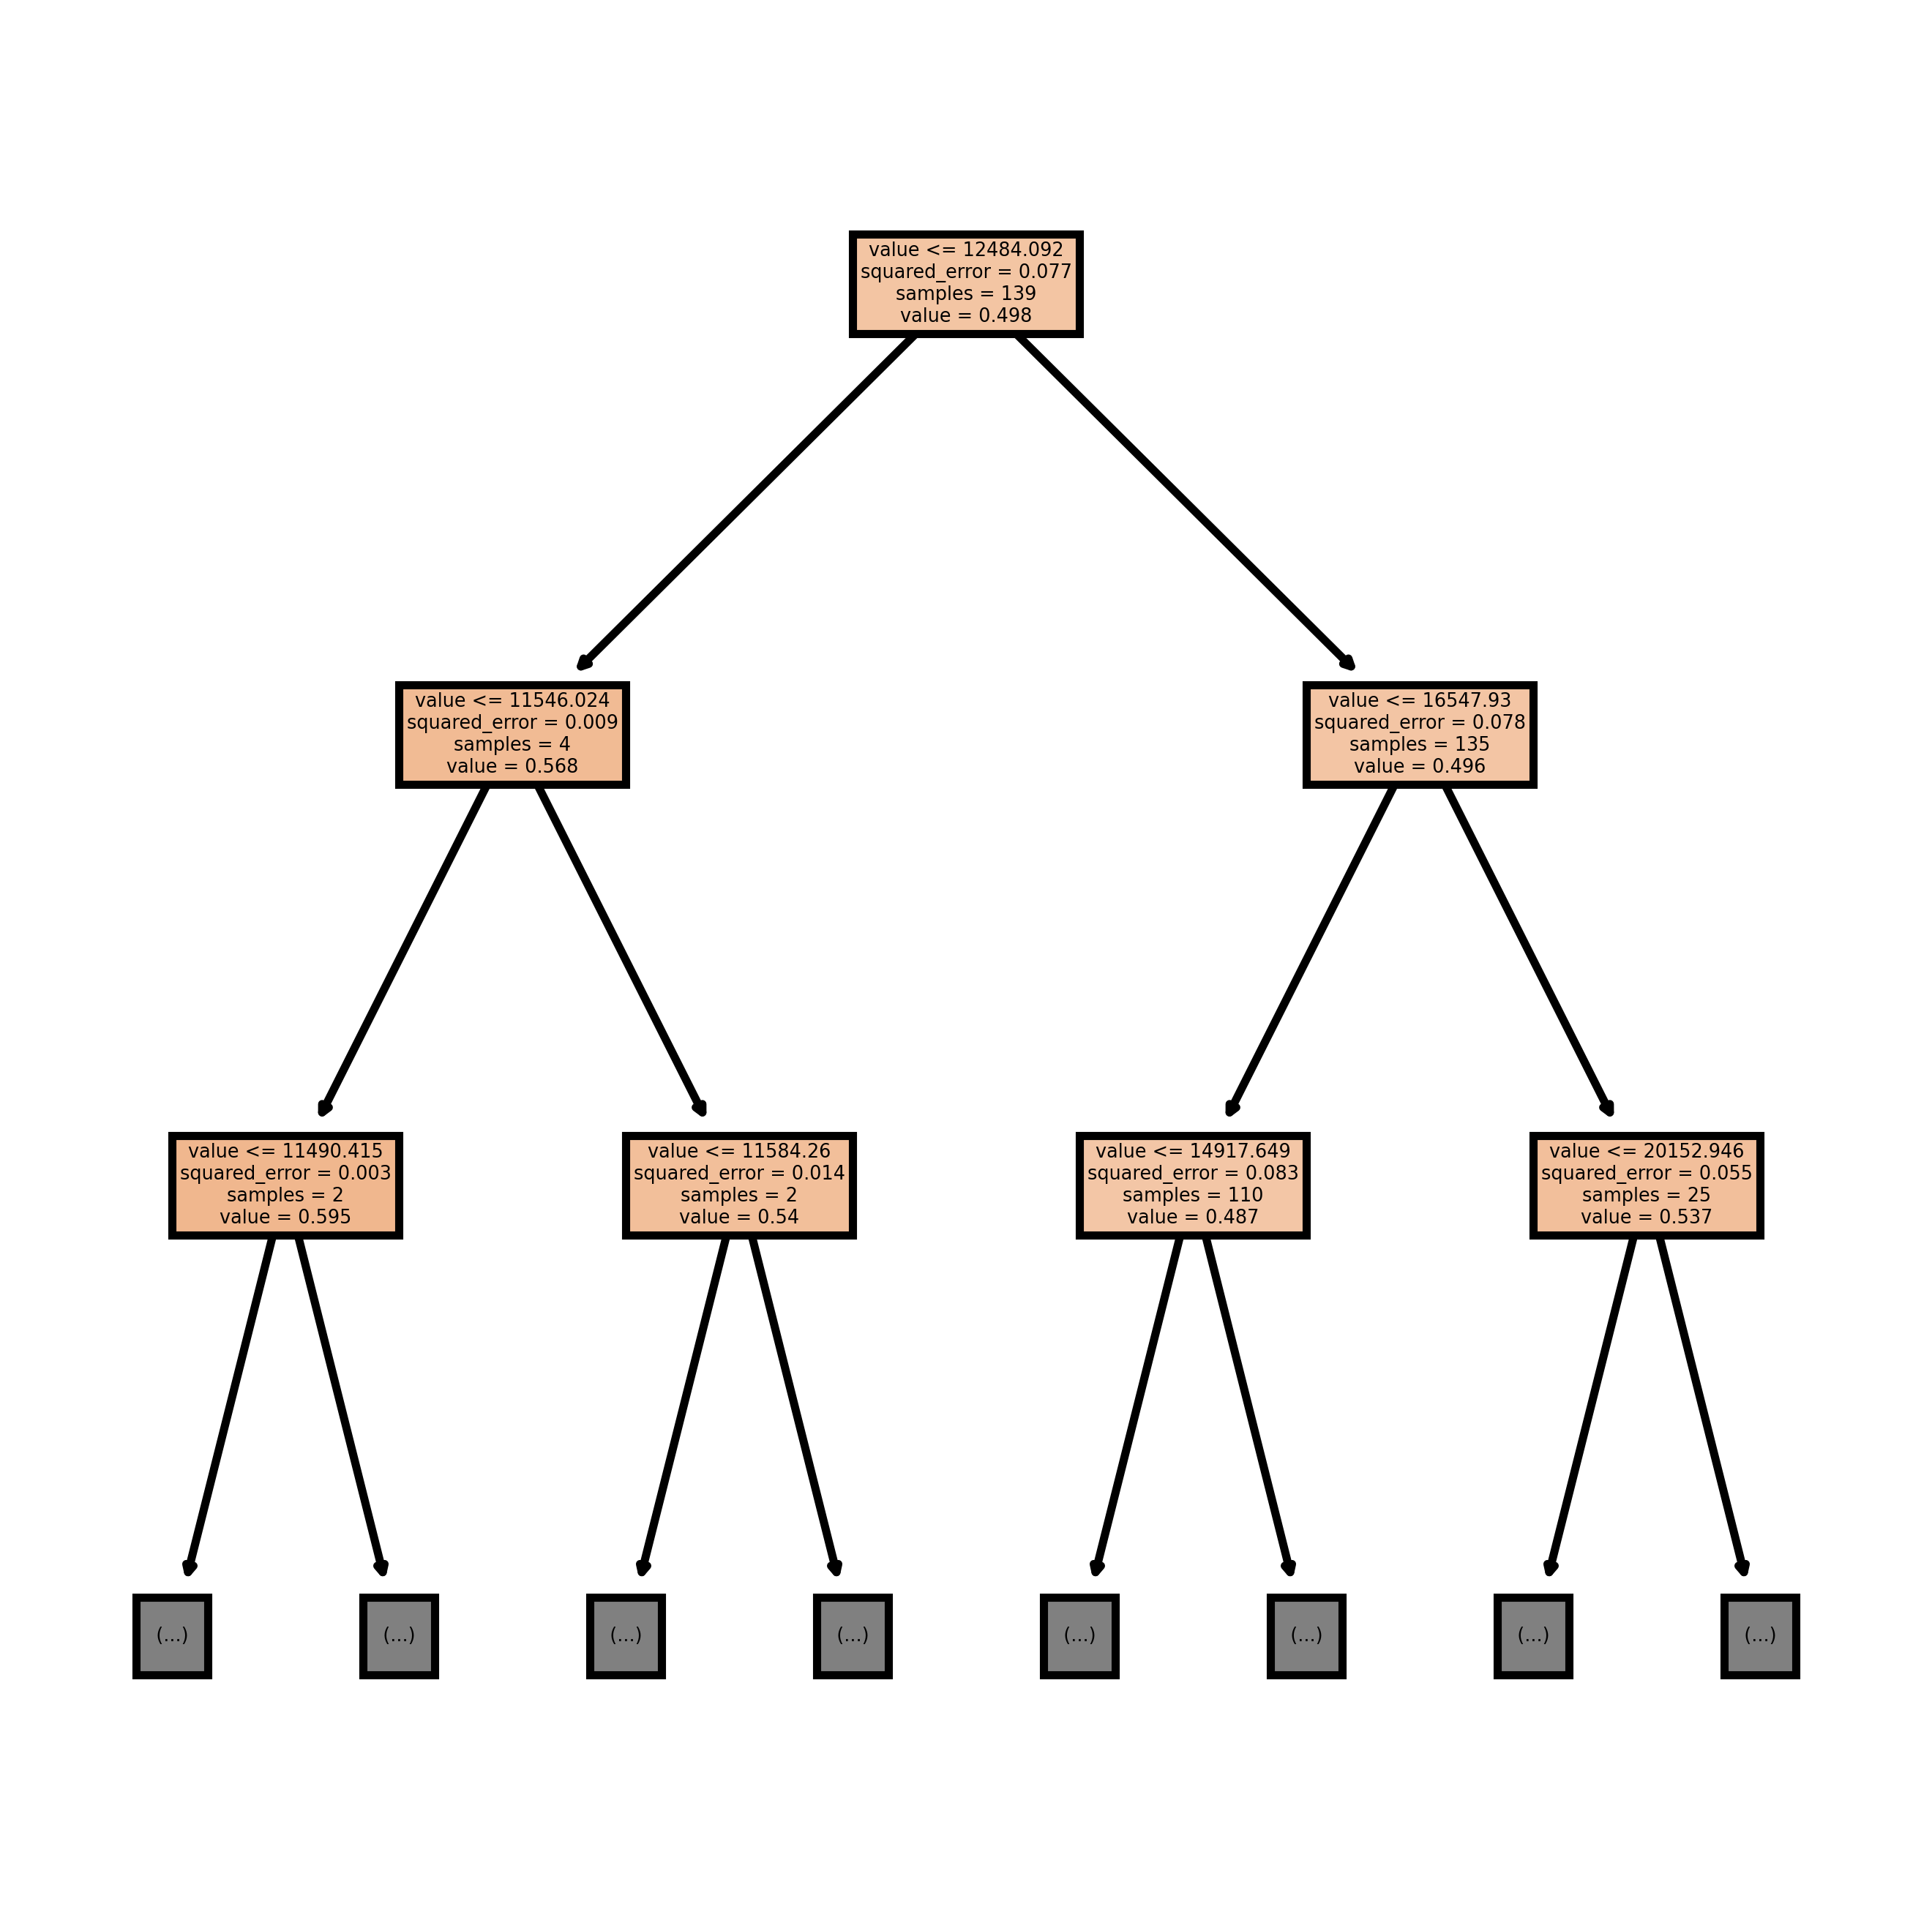

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = df_train1.columns,
               max_depth=2,
               filled = True)
plt.show()

We can recognize the recursive partitioning of the data from the algorithm's description above. Fascinating which intelligent overall behavior can arise from such a simple (and elegant) basic idea!

## **Conclusion**
We succesfully achieved our goal of detecting the defined anomalies in the new york city taxi data set :). In the future, it would be interesting to apply the isolation forest algorithm to more complex data sets where incorporating several features is necessary for succeeding in the task at hand.